<a href="https://colab.research.google.com/github/hitanshu5/EDA/blob/main/FootballEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [590]:
df = pd.read_excel('/content/TASK2- DATA.xlsx')

In [591]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,15/16,LaLiga,26,2/28/16,H,FC Barcelona,Sevilla FC,2:O1,RW,31,1:O1,Direct free kick,NaN
1,2O/21,NaN,NaN,NaN,A,FC Barcelona,NaN,1:OO,NaN,89,NaN,NaN,NaN
2,16/17,LaLiga,25,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header,Javier Mascherano
3,2024-12-13 00:00:00,LaLiga,36,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot,Xabi Alonso
4,22/23,UEFA Champions League,Group Stage,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot,Neymar


In [592]:
df.shape

(1564, 13)

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            1511 non-null   object
 1   Competition       1497 non-null   object
 2   Matchday          1507 non-null   object
 3   Date              1498 non-null   object
 4   Venue             1504 non-null   object
 5   Club              1508 non-null   object
 6   Opponent          1500 non-null   object
 7   Result            1500 non-null   object
 8   Playing_Position  1435 non-null   object
 9   Minute            1500 non-null   object
 10  At_score          1507 non-null   object
 11  Type              1475 non-null   object
 12  Goal_assist       1012 non-null   object
dtypes: object(13)
memory usage: 159.0+ KB


In [594]:
df = df.drop_duplicates()

In [595]:
df = df.dropna()

In [596]:
df.shape

(912, 13)

In [597]:
(df.isnull().sum()/len(df))*100

,0
Season,0.0
Competition,0.0
Matchday,0.0
Date,0.0
Venue,0.0
Club,0.0
Opponent,0.0
Result,0.0
Playing_Position,0.0
Minute,0.0


In [598]:
df.drop(['Goal_assist','Matchday'],axis=1,inplace=True)

In [599]:
df.Season.unique()

array(['16/17', datetime.datetime(2024, 12, 13, 0, 0), '22/23', '15/16',
       '13/14', '17/18', 'O8/O9', datetime.datetime(2024, 12, 11, 0, 0),
       'O9/1O', '18/19', '19/2O', '14/15', '2O/21', '21/22', '1O/11',
       'O7/O8', 'O5/O6', 'O6/O7', 'O4/O5', 'O3/O4', 'O2/O3'], dtype=object)

In [600]:
df['Season'].value_counts()

,count
Season,
2024-12-11 00:00:00,87
2024-12-13 00:00:00,85
14/15,84
1O/11,77
16/17,64
17/18,64
15/16,62
13/14,61
O9/1O,50


In [601]:
import datetime

df[df['Season'] == datetime.datetime(2024, 12, 13, 0, 0)]

,Season,Competition,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
3,2024-12-13 00:00:00,LaLiga,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot
48,2024-12-13 00:00:00,Supercopa,8/23/12,A,Real Madrid,FC Barcelona,3:O2,LW,55,O:O1,Header
60,2024-12-13 00:00:00,LaLiga,9/3O/12,H,Real Madrid,Deportivo de La CoruÃ±a,5:O1,LW,44,3:O1,Header
78,2024-12-13 00:00:00,UEFA Champions League,9/19/12,H,FC Barcelona,Spartak Moscow,3:O2,CF,71,2:O2,Left-footed shot
102,2024-12-13 00:00:00,LaLiga,8/26/12,A,FC Barcelona,CA Osasuna,1:O2,CF,74,1:O1,Left-footed shot
...,...,...,...,...,...,...,...,...,...,...,...
1485,2024-12-13 00:00:00,LaLiga,12/O9/12,A,FC Barcelona,Real Betis Balompie,1:O2,CF,16,O:O1,Left-footed shot
1510,2024-12-13 00:00:00,Copa del Rey,2012-12-12 00:00:00,A,Real Madrid,Celta de Vigo,2:O1,LW,87,2:O1,Left-footed shot
1532,2024-12-13 00:00:00,LaLiga,12/O9/12,A,FC Barcelona,Real Betis Balompie,1:O2,CF,25,O:O2,Left-footed shot
1541,2024-12-13 00:00:00,Supercopa,8/29/12,H,Real Madrid,FC Barcelona,2:O1,LW,19,2:OO,Right-footed shot


In [602]:
df[df['Season'] == datetime.datetime(2024, 12, 11, 0, 0)]

,Season,Competition,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
19,2024-12-11 00:00:00,LaLiga,12-O3/11,H,FC Barcelona,Levante UD,5:OO,CF,55,4:OO,Left-footed shot
23,2024-12-11 00:00:00,LaLiga,8/29/11,H,FC Barcelona,Villarreal CF,5:OO,CF,51,4:OO,Right-footed shot
49,2024-12-11 00:00:00,LaLiga,3/2O/12,H,FC Barcelona,Granada CF,5:O3,CF,16,2:OO,Left-footed shot
106,2024-12-11 00:00:00,Copa del Rey,1/25/12,A,Real Madrid,FC Barcelona,2:O2,LW,68,2:O1,Right-footed shot
119,2024-12-11 00:00:00,UEFA Champions League,2/14/12,A,FC Barcelona,Bayer O4 Leverkusen,1:O3,CF,88,1:O3,Left-footed shot
...,...,...,...,...,...,...,...,...,...,...,...
1495,2024-12-11 00:00:00,LaLiga,3/24/12,H,Real Madrid,Real Sociedad,5:O1,LW,55,5:O1,Right-footed shot
1498,2024-12-11 00:00:00,LaLiga,3/21/12,A,Real Madrid,Villarreal CF,1:O1,LW,61,O:O1,Right-footed shot
1513,2024-12-11 00:00:00,UEFA Champions League,11-O1/11,A,FC Barcelona,FC Viktoria Plzen,O:O4,CF,45+2,O:O2,Left-footed shot
1519,2024-12-11 00:00:00,Copa del Rey,5/25/12,H,FC Barcelona,Athletic Bilbao,3:OO,CF,2O,2:OO,Right-footed shot


In [603]:
import datetime

# Use .loc[] to find rows where 'Season' is datetime.datetime(2024, 12, 11, 0, 0) and rename them
df.loc[df['Season'] == datetime.datetime(2024, 12, 11, 0, 0), 'Season'] = '11/12'
df.loc[df['Season'] == datetime.datetime(2024, 12, 13, 0, 0), 'Season'] = '12/13'

# Check the updated column
print(df['Season'])

2       16/17
3       12/13
4       22/23
5       15/16
6       15/16
        ...  
1557    15/16
1558    1O/11
1560    12/13
1562    2O/21
1563    13/14
Name: Season, Length: 912, dtype: object


In [604]:
df.Season.unique()

array(['16/17', '12/13', '22/23', '15/16', '13/14', '17/18', 'O8/O9',
       '11/12', 'O9/1O', '18/19', '19/2O', '14/15', '2O/21', '21/22',
       '1O/11', 'O7/O8', 'O5/O6', 'O6/O7', 'O4/O5', 'O3/O4', 'O2/O3'],
      dtype=object)

In [605]:
df['Season'] = df['Season'].str.replace('o','0', regex=False)

In [606]:
df.head()

,Season,Competition,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
2,16/17,LaLiga,O3-O1-17,H,FC Barcelona,Sporting GijÃ³n,6:O1,RW,9,1:OO,Header
3,12/13,LaLiga,O5-O8-13,H,Real Madrid,Malaga CF,6:O2,LW,26,2:O1,Right-footed shot
4,22/23,UEFA Champions League,1O/5/22,A,Paris Saint-Germain,SL Benfica,1:1,AM,22,O:1,Left-footed shot
5,15/16,UEFA Champions League,O3-O8-16,H,Real Madrid,AS Roma,2:OO,CF,64,1:OO,Right-footed shot
6,15/16,LaLiga,3/2O/16,H,Real Madrid,Sevilla FC,4:OO,LW,64,2:OO,Left-footed shot


In [607]:
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Premier League', 'Ligue 1',
       'Copa del Rey', 'Serie A', 'Supercopa', 'FIFA Club World Cup',
       'Italy Cup', 'Saudi Pro League', 'FA Cup', 'Supercoppa Italiana',
       'Liga Portugal', 'UEFA Super Cup'], dtype=object)

In [608]:
df['Competition'].value_counts()

,count
Competition,
LaLiga,524
UEFA Champions League,193
Copa del Rey,56
Serie A,48
Premier League,37
Ligue 1,17
Supercopa,14
FIFA Club World Cup,10
Saudi Pro League,4


In [609]:
df['Competition'] = df['Competition'].replace({
    'Champions League': 'UEFA Champions League',
    'UEFA Champions League Qualifying': 'UEFA Champions League',
    'Troph�e des Champions': 'Trophée des Champions'
})

In [610]:
df['Competition'].unique()

array(['LaLiga', 'UEFA Champions League', 'Premier League', 'Ligue 1',
       'Copa del Rey', 'Serie A', 'Supercopa', 'FIFA Club World Cup',
       'Italy Cup', 'Saudi Pro League', 'FA Cup', 'Supercoppa Italiana',
       'Liga Portugal', 'UEFA Super Cup'], dtype=object)

In [611]:
df['Date'].unique()

array(['O3-O1-17', 'O5-O8-13', '1O/5/22', 'O3-O8-16', '3/2O/16',
       'O9-12-15', '2/15/14', 'O4/O7-18', '2/13/16', '4/25/O9', '3/18/14',
       '12-O3/11', 'O8/O6-22', '12-O8-O9', '8/29/11', '3/17/19',
       '1/3O/2O', '1/13/19', 'O3-O3-16', '7/2O/2O', 'O4/O6/1O', '1/18/15',
       '2/22/2O', '2/24/18', '3/16/14', '4/17/16', '8/23/12', '3/2O/12',
       '11/29/2O', '11-O9-13', '11/26/O8', '12/18/O8', '4/29/17',
       '9/3O/12', datetime.datetime(2014, 12, 12, 0, 0), '9/14/21',
       'O3-O2/11', 'O3-O2-14', '5/17/15', 'O2-O1/O9', '1/21/18',
       '3/18/18', '9/18/13', '8/29/1O', 'O5-O2-15', '9/19/12', '1O/19/16',
       '9/24/13', '3/14/15', '1/22/2O', '1/25/14', '5/19/19', 'O5-1O-11',
       '11-O7-18', '11-O1-16', '11/1O/O9', 'O5-O3-O8', '8/26/12',
       '11-O7-O7', '1/2O/13', '1/25/12', '11/O6-13', '9/22/O9', '1/24/O9',
       '9/18/18', '4/29/21', '11-O1-14', 'O4/O8-15', 'O4-O5-11',
       '2/14/12', 'O3/O6-16', '11/19/16', 'O5/O5/12', '12/13/17',
       'O2-O4/12', '11/13/1

In [612]:
df['Date'] = df['Date'].str.replace('-','/', regex=False)
df['Date'] = df['Date'].str.replace('O','0', regex=False)

In [613]:
# Step 2: Convert to datetime with error handling
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y', errors='coerce')

In [614]:
df = df.sort_values(by='Date')

In [615]:
df['Date'].isnull().sum()

13

In [616]:
df['Date'].unique()

<DatetimeArray>
['2002-10-07 00:00:00', '2004-05-22 00:00:00', '2005-02-01 00:00:00',
 '2005-04-17 00:00:00', '2005-05-01 00:00:00', '2005-11-27 00:00:00',
 '2006-01-15 00:00:00', '2006-01-22 00:00:00', '2006-01-29 00:00:00',
 '2006-02-01 00:00:00',
 ...
 '2022-08-06 00:00:00', '2022-08-21 00:00:00', '2022-09-18 00:00:00',
 '2022-10-05 00:00:00', '2022-10-21 00:00:00', '2022-10-25 00:00:00',
 '2022-10-29 00:00:00', '2023-02-25 00:00:00', '2023-02-26 00:00:00',
                 'NaT']
Length: 602, dtype: datetime64[ns]

In [617]:
df['Result'].unique()

array(['3:OO', '2:O4', '1:O4', '2:OO', '4:O1', '2:O1', 'O:O3', '1:O3',
       '4:OO', '2:O3', '1:O1', '3:O1', '3:O3', '7:O1', '5:O2', '3:O2',
       'O:O6', '2:O2', '1:O5', 'O:O1', 'O:O2', '6:OO', '5:O1',
       '6:5 on pens', '1:O6', '1:O2', 'O:O5', '4:O3', '2:O5', '3:O5',
       '2:O6', '5:OO', '6:O1', '4:O2', '1:2 AET', 'O:O8', 'O:O4', '8:OO',
       '7:OO', 'O:1 AET', '8:O1', '6:O2', '5:O3', '3:4 on pens', 'O:O7',
       '4:O5', '2:1 AET', '7:O3', '3:O4', '2:O8', '9:O1', '1O:O2',
       '4:2 AET', '6:O3', '8:O2', '1:OO', '1:O7', '1:1', 'O:3', '7:2',
       '4:3', 'O:4', '1:3', '2:O', '2:1'], dtype=object)

In [618]:
import re

# Replace 'o' with '0'
df['Result'] = df['Result'].str.replace('o', '0', regex=False)

# Clean and standardize the results
def clean_result(result):
    if pd.isnull(result):
        return result
    # Remove all non-numeric and colon characters
    result = re.sub(r'[^\d:]', '', result)
    # Fix patterns like ':1' to '0:1' and '1:' to '1:0'
    if result.startswith(':'):
        result = '0' + result
    if result.endswith(':'):
        result += '0'
    # Cap results like '6:50' to '6:5'
    result = re.sub(r'(\d+):(\d{2,})', lambda m: f"{m.group(1)}:{m.group(2)[:1]}", result)
    return result

df['Result'] = df['Result'].apply(clean_result)

In [619]:
df['Result'].unique()

array(['3:0', '2:4', '1:4', '2:0', '4:1', '2:1', '0:3', '1:3', '4:0',
       '2:3', '1:1', '3:1', '3:3', '7:1', '5:2', '3:2', '0:6', '2:2',
       '1:5', '0:1', '0:2', '6:0', '5:1', '6:5', '1:6', '1:2', '0:5',
       '4:3', '2:5', '3:5', '2:6', '5:0', '6:1', '4:2', '0:8', '0:4',
       '8:0', '7:0', '8:1', '6:2', '5:3', '3:4', '0:7', '4:5', '7:3',
       '2:8', '9:1', '6:3', '8:2', '1:0', '1:7', '7:2'], dtype=object)

In [620]:
import re

# Replace 'o' with '0'
df['At_score'] = df['At_score'].str.replace('o', '0', regex=False)

# Clean and standardize the results
def clean_result(result):
    if pd.isnull(result):
        return result
    # Remove all non-numeric and colon characters
    result = re.sub(r'[^\d:]', '', result)
    # Fix patterns like ':1' to '0:1' and '1:' to '1:0'
    if result.startswith(':'):
        result = '0' + result
    if result.endswith(':'):
        result += '0'
    # Cap results like '6:50' to '6:5'
    result = re.sub(r'(\d+):(\d{2,})', lambda m: f"{m.group(1)}:{m.group(2)[:1]}", result)
    return result

df['At_score'] = df['At_score'].apply(clean_result)

In [621]:
df['At_score'].unique()

array(['3:0', '1:0', '2:3', '2:2', '1:4', '2:0', '2:1', '0:3', '0:2',
       '1:2', '1:1', '3:1', '3:3', '4:0', '5:0', '0:5', '0:1', '0:4',
       '1:6', '1:5', '1:3', '3:2', '2:5', '5:2', '5:1', '4:2', '4:1',
       '6:1', '0:7', '6:0', '7:0', '7:1', '0:6', '8:0', '3:5', '2:4',
       '6:3', '9:1', '6:2', '3:4'], dtype=object)

In [622]:
df.head()

,Season,Competition,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type
937,O2/O3,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,3:0,LW,9O+5,3:0,Header
444,O3/O4,FA Cup,2004-05-22,H,Manchester United,Millwall FC,3:0,RW,44,1:0,Header
297,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,2:4,RW,58,2:3,Tap-in
1091,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,2:4,RW,54,2:2,Left-footed shot
1031,O4/O5,FA Cup,2005-04-17,A,Manchester United,Newcastle United,1:4,RW,76,1:4,Right-footed shot


In [623]:
df['Type'].unique()

array(['Header', 'Tap-in', 'Left-footed shot', 'Right-footed shot',
       'Solo run', 'Deflected shot on goal', 'Counter attack goal',
       'Long distance kick', 'Chest', 'Penalty rebound'], dtype=object)

In [624]:
# Split the 'Result' column into two new columns 'Club_Score' and 'Opponent_Score'
df[['Club_Score', 'Opponent_Score']] = df['Result'].str.split(':', expand=True)

In [625]:
df.drop('Result', axis=1, inplace=True)

In [626]:
df.head()

,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,At_score,Type,Club_Score,Opponent_Score
937,O2/O3,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,9O+5,3:0,Header,3,0
444,O3/O4,FA Cup,2004-05-22,H,Manchester United,Millwall FC,RW,44,1:0,Header,3,0
297,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,RW,58,2:3,Tap-in,2,4
1091,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,RW,54,2:2,Left-footed shot,2,4
1031,O4/O5,FA Cup,2005-04-17,A,Manchester United,Newcastle United,RW,76,1:4,Right-footed shot,1,4


In [627]:
df['Club_Score'] = df['Club_Score'].fillna(0)

In [628]:
df['Opponent_Score'] = df['Opponent_Score'].fillna(0)

In [629]:
df['Club_Score'] = df['Club_Score'].astype(int)
df['Opponent_Score'] = df['Opponent_Score'].astype(int)

In [630]:
import pandas as pd

# Define a function to determine the winner with club and opponent names
def determine_winner(row):
    if row['Club_Score'] > row['Opponent_Score']:
        return row['Club']  # Return the name of the club
    elif row['Opponent_Score'] > row['Club_Score']:
        return row['Opponent']  # Return the name of the opponent
    else:
        return 'Tied'  # Return 'Tied' for a draw

# Apply the function to each row to create the Winner column
df['Winner'] = df.apply(determine_winner, axis=1)

# Display the updated DataFrame
df.head(15)

,Season,Competition,Date,Venue,Club,Opponent,Playing_Position,Minute,At_score,Type,Club_Score,Opponent_Score,Winner
937,O2/O3,Liga Portugal,2002-10-07,H,Sporting CP,Moreirense FC,LW,9O+5,3:0,Header,3,0,Sporting CP
444,O3/O4,FA Cup,2004-05-22,H,Manchester United,Millwall FC,RW,44,1:0,Header,3,0,Manchester United
297,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,RW,58,2:3,Tap-in,2,4,Arsenal FC
1091,O4/O5,Premier League,2005-02-01,A,Manchester United,Arsenal FC,RW,54,2:2,Left-footed shot,2,4,Arsenal FC
1031,O4/O5,FA Cup,2005-04-17,A,Manchester United,Newcastle United,RW,76,1:4,Right-footed shot,1,4,Newcastle United
228,O4/O5,LaLiga,2005-05-01,H,FC Barcelona,Albacete Balompie,CF,9O+1,2:0,Left-footed shot,2,0,FC Barcelona
1352,O5/O6,LaLiga,2005-11-27,H,FC Barcelona,Racing Santander,RW,51,2:0,Left-footed shot,4,1,FC Barcelona
1451,O5/O6,LaLiga,2006-01-15,H,FC Barcelona,Athletic Bilbao,RW,5O,2:1,Left-footed shot,2,1,FC Barcelona
617,O5/O6,LaLiga,2006-01-22,H,FC Barcelona,Deportivo Alaves,CF,82,2:0,Left-footed shot,2,0,FC Barcelona
159,O5/O6,LaLiga,2006-01-29,A,FC Barcelona,RCD Mallorca,CF,83,0:3,Left-footed shot,0,3,RCD Mallorca


In [631]:
df['Winner'].unique()

array(['Sporting CP', 'Manchester United', 'Arsenal FC',
       'Newcastle United', 'FC Barcelona', 'RCD Mallorca',
       'Portsmouth FC', 'Celta de Vigo', 'Tied', 'Atletico de Madrid',
       'Gimnastic de Tarragona', 'Levante UD', 'VfB Stuttgart',
       'Dynamo Kyiv', 'Celtic FC', 'AS Roma', 'Sporting GijÃ³n',
       'Shakhtar Donetsk', 'FC Basel 1893', 'Recreativo Huelva',
       'Sevilla FC', 'Gamba Osaka', 'CA Osasuna', 'West Bromwich Albion',
       'Racing Santander', 'Derby County', 'FC Porto', 'Getafe CF',
       'Real Madrid', 'Deportivo de La Coruaa', 'Olympique Marseille',
       'CF Atlante', 'Club Estudiantes de La Plata', 'CD Tenerife',
       'Real Valladolid CF', 'Real Zaragoza', 'Villarreal CF',
       'Malaga CF', 'Hercules CF', 'UD Almera', 'Ajax Amsterdam',
       'Panathinaikos Athens', 'Valencia CF', 'Athletic Bilbao',
       'Tottenham Hotspur', 'BATE Borisov', 'FC Viktoria Plzen',
       'SD Ponferradina', 'Santos FC', 'Bayer O4 Leverkusen',
       'Real Beti

In [632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 937 to 1510
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Season            912 non-null    object        
 1   Competition       912 non-null    object        
 2   Date              899 non-null    datetime64[ns]
 3   Venue             912 non-null    object        
 4   Club              912 non-null    object        
 5   Opponent          912 non-null    object        
 6   Playing_Position  912 non-null    object        
 7   Minute            912 non-null    object        
 8   At_score          912 non-null    object        
 9   Type              912 non-null    object        
 10  Club_Score        912 non-null    int64         
 11  Opponent_Score    912 non-null    int64         
 12  Winner            912 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 99.8+ KB


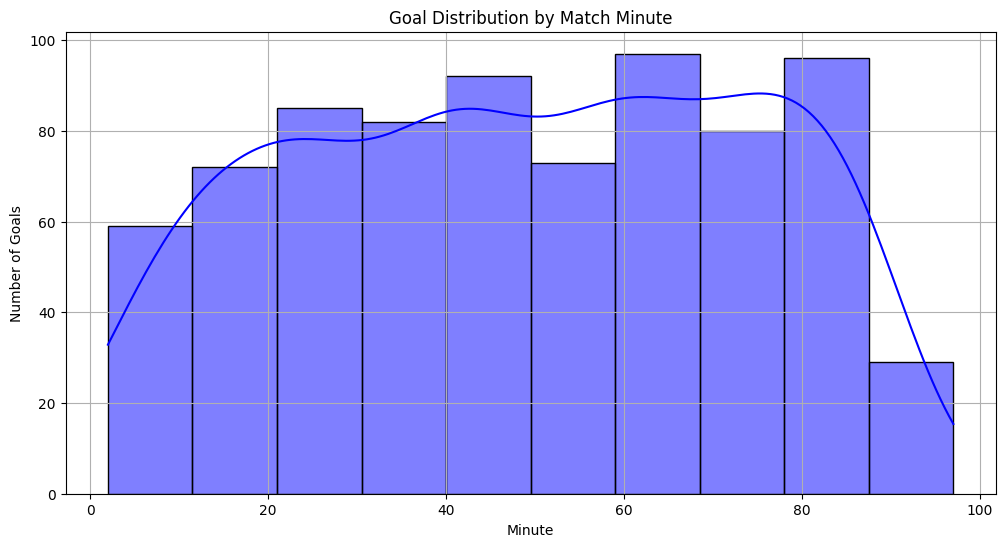

In [633]:
# Convert 'Minute' column to numeric (handle errors if any)
df['Minute'] = pd.to_numeric(df['Minute'], errors='coerce')

# Plot goal distribution over time
plt.figure(figsize=(12, 6))
sns.histplot(df['Minute'], bins=10, kde=True, color='blue')
plt.title('Goal Distribution by Match Minute')
plt.xlabel('Minute')
plt.ylabel('Number of Goals')
plt.grid(True)
plt.show()

In [634]:
df['Playing_Position'].value_counts()

,count
Playing_Position,
CF,367
RW,256
LW,243
SS,36
AM,10


<ipython-input-635-22e3b63cfc4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=goals_by_position.index, y=goals_by_position.values, palette='Blues_d')


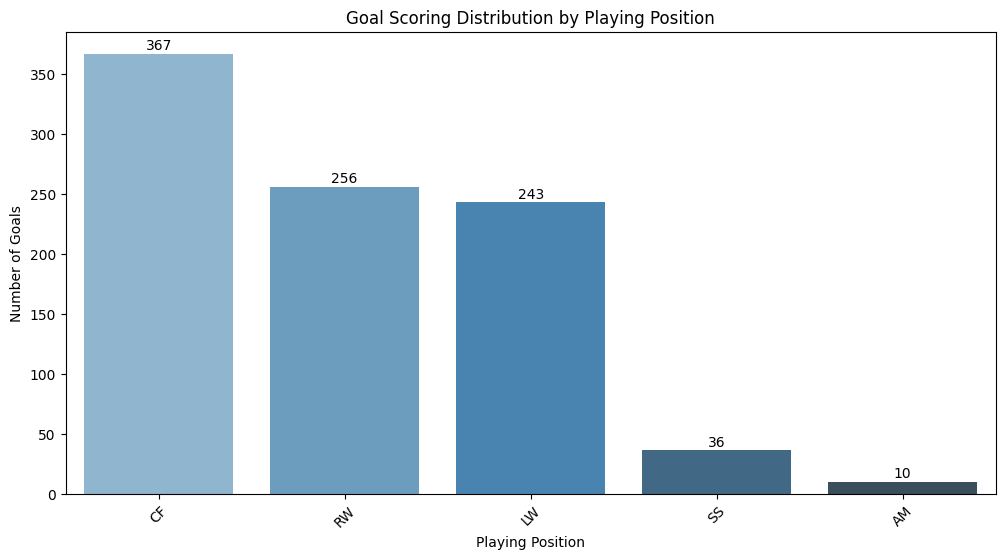

In [635]:
# Count of goals by playing position
goals_by_position = df.groupby('Playing_Position').size().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=goals_by_position.index, y=goals_by_position.values, palette='Blues_d')

# Add the counts on top of each bar
for index, value in enumerate(goals_by_position.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')  # Position the text slightly above the bar

# Customize the plot
plt.title('Goal Scoring Distribution by Playing Position')
plt.xlabel('Playing Position')
plt.ylabel('Number of Goals')
plt.xticks(rotation=45)
plt.show()

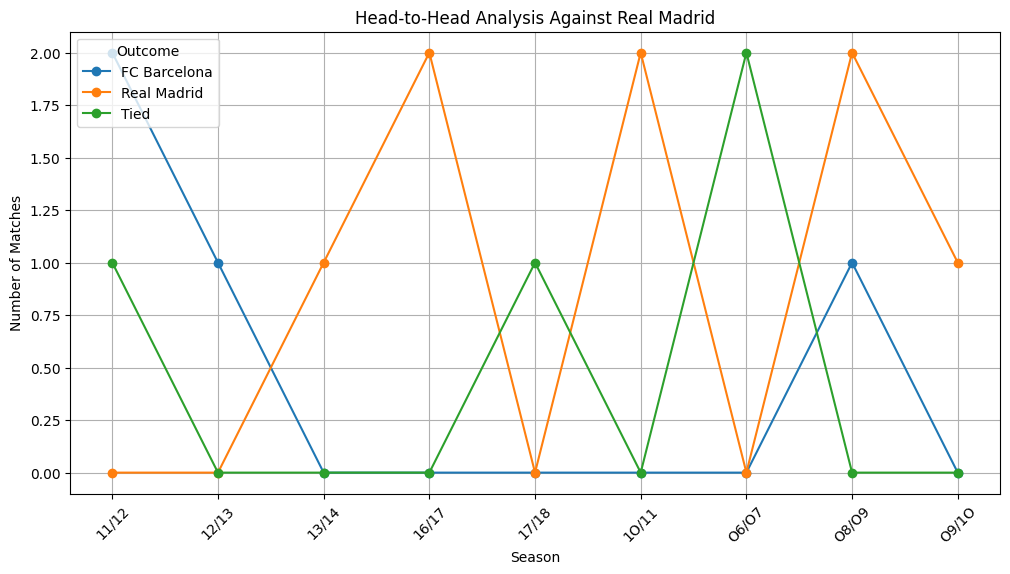

In [636]:
# Select a specific opponent for head-to-head analysis (e.g., 'Real Madrid')
specific_opponent = df[df['Opponent'] == 'Real Madrid']

# Count of outcomes against this opponent
outcome_against_opponent = specific_opponent.groupby(['Season', 'Winner']).size().unstack(fill_value=0)

# Plot line chart for head-to-head results over seasons
outcome_against_opponent.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Head-to-Head Analysis Against Real Madrid')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Outcome', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()